In [2]:
import pandas as pd

data = pd.read_csv('applications data.csv')

In [3]:
data.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,20160101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,20160101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,20160101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,20160101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,20160101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0


In [4]:
df = data

In [5]:
df['date'] = pd.to_datetime(df.date.astype(str).apply(lambda x:x[:4]+ '-'+x[4:6]+'-'+x[6:]))
df['zip5'] = df['zip5'].apply(lambda x: '{0:0>5}'.format(x))

In [6]:
df.loc[df.ssn == 999999999, 'ssn'] = -df[df.ssn==999999999]['record']

In [7]:
df['ssn'] = df['ssn'].apply(lambda x: '{0:0>9}'.format(x))

In [8]:
df.loc[df.address == '123 MAIN ST', 'address'] = \
    df.loc[df.address == '123 MAIN ST', 'record'].apply(lambda x: str(x) + 'RECORD')

In [9]:
df.loc[df.dob == 19070626, 'dob'] = -df.loc[df.dob == 19070626]['record']
df['dob'] = df['dob'].apply(lambda x: '{0:0>8}'.format(x))

In [10]:
df.loc[df.homephone == 9999999999, 'homephone'] = -df.loc[df.homephone == 9999999999]['record']
df['homephone'] = df['homephone'].apply(lambda x: '{0:0>10}'.format(x))

In [11]:
df.columns

Index(['record', 'date', 'ssn', 'firstname', 'lastname', 'address', 'zip5',
       'dob', 'homephone', 'fraud_label'],
      dtype='object')

In [12]:
df['name'] = df.firstname + df.lastname
df['fulladdress'] = df.address + df.zip5
df['namedob'] = df.name + df.dob

# Combinations among namedob, fulladdress, homephone, and ssn.
df['namedob_fulladdress'] = df.namedob + df.fulladdress
df['namedob_homephone'] = df.namedob + df.homephone
df['namedob_ssn'] = df.namedob + df.ssn

df['fulladdress_homephone'] = df.fulladdress + df.homephone
df['fulladdress_ssn'] = df.fulladdress + df.ssn

df['homephone_ssn'] = df.homephone + df.ssn

# Combination groups of 2 + 1
df['namedob_fulladdress_homephone'] = df.namedob + df.fulladdress+df.homephone 
df['namedob_fulladdress_ssn'] = df.namedob + df.fulladdress + df.ssn

df['namedob_homephone_ssn'] = df.namedob + df.homephone + df.ssn
df['fulladdress_homephone_ssn'] = df.fulladdress + df.homephone + df.ssn

# All 4 variables concatenated.
df['namedob_fulladdress_homephone_ssn'] = df.namedob + df.fulladdress + df.homephone + df.ssn

# Break up last/firstname and combine with entities 
#that does not include namedob.

df['firstname_fulladdress_homephone'] = df.firstname + df.fulladdress + df.homephone
df['firstname_fulladdress_ssn'] = df.firstname + df.fulladdress + df.ssn
df['firstname_homephone_ssn'] = df.firstname + df.homephone + df.ssn
df['firstname_fulladdress_homephone_ssn'] = df.firstname + df.fulladdress + df.homephone + df.ssn

df['lastname_fulladdress_homephone'] = df.lastname + df.fulladdress + df.homephone
df['lastname_fulladdress_ssn'] = df.lastname + df.fulladdress + df.ssn
df['lastname_homephone_ssn'] = df.lastname + df.homephone + df.ssn
df['lastname_fulladdress_homephone_ssn'] = df.lastname + df.fulladdress + df.homephone + df.ssn

# add zip5 to entities that does not include fulladdress

df['zip_namedob_homephone'] = df.zip5 + df.namedob + df.homephone
df['zip_namedob_ssn'] = df.zip5 + df.namedob + df.ssn
df['zip_homephone_ssn'] = df.zip5 + df.homephone + df.ssn
df['zip_namedob_homephone_ssn'] = df.zip5 + df.namedob + df.homephone + df.ssn

In [13]:
df.columns

Index(['record', 'date', 'ssn', 'firstname', 'lastname', 'address', 'zip5',
       'dob', 'homephone', 'fraud_label', 'name', 'fulladdress', 'namedob',
       'namedob_fulladdress', 'namedob_homephone', 'namedob_ssn',
       'fulladdress_homephone', 'fulladdress_ssn', 'homephone_ssn',
       'namedob_fulladdress_homephone', 'namedob_fulladdress_ssn',
       'namedob_homephone_ssn', 'fulladdress_homephone_ssn',
       'namedob_fulladdress_homephone_ssn', 'firstname_fulladdress_homephone',
       'firstname_fulladdress_ssn', 'firstname_homephone_ssn',
       'firstname_fulladdress_homephone_ssn', 'lastname_fulladdress_homephone',
       'lastname_fulladdress_ssn', 'lastname_homephone_ssn',
       'lastname_fulladdress_homephone_ssn', 'zip_namedob_homephone',
       'zip_namedob_ssn', 'zip_homephone_ssn', 'zip_namedob_homephone_ssn'],
      dtype='object')

In [14]:
df.head(5)

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,...,firstname_homephone_ssn,firstname_fulladdress_homephone_ssn,lastname_fulladdress_homephone,lastname_fulladdress_ssn,lastname_homephone_ssn,lastname_fulladdress_homephone_ssn,zip_namedob_homephone,zip_namedob_ssn,zip_homephone_ssn,zip_namedob_homephone_ssn
0,1,2016-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,02765,000000-1,1797504115,0,...,XRRAMMTR1797504115379070012,XRRAMMTR6861 EUTST PL027651797504115379070012,SMJETJMJ6861 EUTST PL027651797504115,SMJETJMJ6861 EUTST PL02765379070012,SMJETJMJ1797504115379070012,SMJETJMJ6861 EUTST PL027651797504115379070012,02765XRRAMMTRSMJETJMJ000000-11797504115,02765XRRAMMTRSMJETJMJ000000-1379070012,027651797504115379070012,02765XRRAMMTRSMJETJMJ000000-11797504115379070012
1,2,2016-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1,...,MAMSTUJR4164239415387482503,MAMSTUJR7280 URASA PL571694164239415387482503,RTTEMRRR7280 URASA PL571694164239415,RTTEMRRR7280 URASA PL57169387482503,RTTEMRRR4164239415387482503,RTTEMRRR7280 URASA PL571694164239415387482503,57169MAMSTUJRRTTEMRRR193406154164239415,57169MAMSTUJRRTTEMRRR19340615387482503,571694164239415387482503,57169MAMSTUJRRTTEMRRR193406154164239415387482503
2,3,2016-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,000000-3,0216537580,0,...,SZMMUJEZS0216537580200332444,SZMMUJEZS5581 RSREX LN567210216537580200332444,EUSEZRAE5581 RSREX LN567210216537580,EUSEZRAE5581 RSREX LN56721200332444,EUSEZRAE0216537580200332444,EUSEZRAE5581 RSREX LN567210216537580200332444,56721SZMMUJEZSEUSEZRAE000000-30216537580,56721SZMMUJEZSEUSEZRAE000000-3200332444,567210216537580200332444,56721SZMMUJEZSEUSEZRAE000000-30216537580200332444
3,4,2016-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,0132144161,0,...,SJJZSXRSZ0132144161747451317,SJJZSXRSZ1387 UJZXJ RD352860132144161747451317,ETJXTXXS1387 UJZXJ RD352860132144161,ETJXTXXS1387 UJZXJ RD35286747451317,ETJXTXXS0132144161747451317,ETJXTXXS1387 UJZXJ RD352860132144161747451317,35286SJJZSXRSZETJXTXXS194404300132144161,35286SJJZSXRSZETJXTXXS19440430747451317,352860132144161747451317,35286SJJZSXRSZETJXTXXS194404300132144161747451317
4,5,2016-01-01,024065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,03173,19980315,6101082272,0,...,SSSXUEJMS6101082272024065868,SSSXUEJMS279 EAASA WY031736101082272024065868,SSUUJXUZ279 EAASA WY031736101082272,SSUUJXUZ279 EAASA WY03173024065868,SSUUJXUZ6101082272024065868,SSUUJXUZ279 EAASA WY031736101082272024065868,03173SSSXUEJMSSSUUJXUZ199803156101082272,03173SSSXUEJMSSSUUJXUZ19980315024065868,031736101082272024065868,03173SSSXUEJMSSSUUJXUZ199803156101082272024065868


In [15]:
import numpy as np

In [15]:
#for field in list(df.iloc[:, np.r_[3:9, 12:15]].columns):
#    df['ssn_' + field] = df.ssn + df[field]

In [16]:
attributes = list(df.iloc[:, np.r_[2, 5, 7, 8, 12:36]].columns)

In [17]:
attributes

['ssn',
 'address',
 'dob',
 'homephone',
 'namedob',
 'namedob_fulladdress',
 'namedob_homephone',
 'namedob_ssn',
 'fulladdress_homephone',
 'fulladdress_ssn',
 'homephone_ssn',
 'namedob_fulladdress_homephone',
 'namedob_fulladdress_ssn',
 'namedob_homephone_ssn',
 'fulladdress_homephone_ssn',
 'namedob_fulladdress_homephone_ssn',
 'firstname_fulladdress_homephone',
 'firstname_fulladdress_ssn',
 'firstname_homephone_ssn',
 'firstname_fulladdress_homephone_ssn',
 'lastname_fulladdress_homephone',
 'lastname_fulladdress_ssn',
 'lastname_homephone_ssn',
 'lastname_fulladdress_homephone_ssn',
 'zip_namedob_homephone',
 'zip_namedob_ssn',
 'zip_homephone_ssn',
 'zip_namedob_homephone_ssn']

In [18]:
import calendar

df['dow'] = df.date.apply(lambda x: calendar.day_name[x.weekday()])
train_test = df[df.date < '2016-11-01']

In [19]:
c = 4; nmid = 20; y_avg = train_test['fraud_label'].mean()
y_dow = train_test.groupby('dow')['fraud_label'].mean()
num = train_test.groupby('dow').size()
y_dow_smooth = y_avg + (y_dow - y_avg)/ (1+ np.exp(-(num - nmid)/c))
df['dow_risk'] = df.dow.map(y_dow_smooth)

In [20]:
df1 = df.copy()

final = df.copy()
df1['check_date'] = df1.date
df1['check_record'] = df1.record

In [21]:
pip install timer

Note: you may need to restart the kernel to use updated packages.


In [22]:
from timeit import default_timer as timer
import datetime as dt

In [23]:
start = timer()

for entity in attributes:
    st = timer()
    df_1 = df1[['record', 'date', entity]]
    df_r = df1[['check_record', 'check_date', entity]]
    temp = pd.merge(df_1, df_r, left_on = entity, right_on = entity)
    
    # Day since
    day_since_df = temp[temp.record > temp.check_record][['record', 'date', 'check_date']] \
        .groupby('record')[['date', 'check_date']].last()
    mapper = (day_since_df.date - day_since_df.check_date).dt.days
    final[entity + '_day_since'] = final.record.map(mapper)
    final[entity + '_day_since'].fillna(365, inplace = True)
    print(f' \n{entity}_day_since ---> Done')
    
    # velocity
    for offset_t in [0, 1,3, 7, 14, 30, 60]:
        count_day_df = temp[(temp.check_date >= (temp.date - dt.timedelta(offset_t)))
                           & (temp.record >= temp.check_record)]
        col_name = f'{entity}_count_{offset_t}'
        mapper2 = count_day_df.groupby('record')[entity].count()
        final[col_name] = final.record.map(mapper2)
        
        print(f'{entity}_count_{str(offset_t)} ---> Done')
    
    print(f'Run time for entity {entity} -------------- {timer() - st:0.2f}s')

print(f'Total run time: {(timer() - start) / 60: 0.2f}min')

 
ssn_day_since ---> Done
ssn_count_0 ---> Done
ssn_count_1 ---> Done
ssn_count_3 ---> Done
ssn_count_7 ---> Done
ssn_count_14 ---> Done
ssn_count_30 ---> Done
ssn_count_60 ---> Done
Run time for entity ssn -------------- 5.70s
 
address_day_since ---> Done
address_count_0 ---> Done
address_count_1 ---> Done
address_count_3 ---> Done
address_count_7 ---> Done
address_count_14 ---> Done
address_count_30 ---> Done
address_count_60 ---> Done
Run time for entity address -------------- 5.28s
 
dob_day_since ---> Done
dob_count_0 ---> Done
dob_count_1 ---> Done
dob_count_3 ---> Done
dob_count_7 ---> Done
dob_count_14 ---> Done
dob_count_30 ---> Done
dob_count_60 ---> Done
Run time for entity dob -------------- 44.53s
 
homephone_day_since ---> Done
homephone_count_0 ---> Done
homephone_count_1 ---> Done
homephone_count_3 ---> Done
homephone_count_7 ---> Done
homephone_count_14 ---> Done
homephone_count_30 ---> Done
homephone_count_60 ---> Done
Run time for entity homephone -------------- 34.

 
lastname_homephone_ssn_day_since ---> Done
lastname_homephone_ssn_count_0 ---> Done
lastname_homephone_ssn_count_1 ---> Done
lastname_homephone_ssn_count_3 ---> Done
lastname_homephone_ssn_count_7 ---> Done
lastname_homephone_ssn_count_14 ---> Done
lastname_homephone_ssn_count_30 ---> Done
lastname_homephone_ssn_count_60 ---> Done
Run time for entity lastname_homephone_ssn -------------- 4.92s
 
lastname_fulladdress_homephone_ssn_day_since ---> Done
lastname_fulladdress_homephone_ssn_count_0 ---> Done
lastname_fulladdress_homephone_ssn_count_1 ---> Done
lastname_fulladdress_homephone_ssn_count_3 ---> Done
lastname_fulladdress_homephone_ssn_count_7 ---> Done
lastname_fulladdress_homephone_ssn_count_14 ---> Done
lastname_fulladdress_homephone_ssn_count_30 ---> Done
lastname_fulladdress_homephone_ssn_count_60 ---> Done
Run time for entity lastname_fulladdress_homephone_ssn -------------- 5.02s
 
zip_namedob_homephone_day_since ---> Done
zip_namedob_homephone_count_0 ---> Done
zip_namedo

In [24]:
start = timer()
for att in attributes:
    for d in ['0', '1']:
        for dd in ['3', '7', '14', '30']:
            final[att + '_count_' + d + '_by_' + dd] \
                = final[att + '_count_' + d] / (final[att + '_count_' + dd]/float(dd))
print(f'Total run time: {timer() - start:0.2f}s')

Total run time: 17.08s


In [25]:
final.shape

(1000000, 486)

In [26]:
remove_first_2 = final[final['date'] > '2016-01-15']

In [27]:
mydata = remove_first_2[remove_first_2['date'] < '2016-11-01']

In [28]:
variables = mydata.iloc[:, 36:].columns

In [29]:
import scipy.stats as sps

from scipy.stats import ks_2samp

In [30]:
import numpy as np

In [31]:
table = []
start = timer()
for column in variables:
    st = timer()
    a = [column]
    b = sps.ks_2samp(mydata[mydata['fraud_label'] == 0][column], mydata[mydata['fraud_label'] == 1][column])[0]
    a.append(b)
    print(f'variable {column} ---> Done')
    table.append(a)
    print(f'Run time for variable {column} -------------- {timer() - st:0.2f}s')

print(f'Total run time: {timer() - start:0.2f}s')   
KSFDR = pd.DataFrame(table, columns = ['variable_name', 'ks'])

variable dow ---> Done
Run time for variable dow -------------- 13.78s
variable dow_risk ---> Done
Run time for variable dow_risk -------------- 8.60s
variable ssn_day_since ---> Done
Run time for variable ssn_day_since -------------- 8.50s
variable ssn_count_0 ---> Done
Run time for variable ssn_count_0 -------------- 10.67s
variable ssn_count_1 ---> Done
Run time for variable ssn_count_1 -------------- 9.83s
variable ssn_count_3 ---> Done
Run time for variable ssn_count_3 -------------- 10.06s
variable ssn_count_7 ---> Done
Run time for variable ssn_count_7 -------------- 11.13s
variable ssn_count_14 ---> Done
Run time for variable ssn_count_14 -------------- 10.50s
variable ssn_count_30 ---> Done
Run time for variable ssn_count_30 -------------- 10.07s
variable ssn_count_60 ---> Done
Run time for variable ssn_count_60 -------------- 9.99s
variable address_day_since ---> Done
Run time for variable address_day_since -------------- 10.97s
variable address_count_0 ---> Done
Run time for

variable fulladdress_ssn_count_30 ---> Done
Run time for variable fulladdress_ssn_count_30 -------------- 9.48s
variable fulladdress_ssn_count_60 ---> Done
Run time for variable fulladdress_ssn_count_60 -------------- 9.61s
variable homephone_ssn_day_since ---> Done
Run time for variable homephone_ssn_day_since -------------- 9.30s
variable homephone_ssn_count_0 ---> Done
Run time for variable homephone_ssn_count_0 -------------- 9.02s
variable homephone_ssn_count_1 ---> Done
Run time for variable homephone_ssn_count_1 -------------- 9.50s
variable homephone_ssn_count_3 ---> Done
Run time for variable homephone_ssn_count_3 -------------- 9.13s
variable homephone_ssn_count_7 ---> Done
Run time for variable homephone_ssn_count_7 -------------- 11.59s
variable homephone_ssn_count_14 ---> Done
Run time for variable homephone_ssn_count_14 -------------- 8.48s
variable homephone_ssn_count_30 ---> Done
Run time for variable homephone_ssn_count_30 -------------- 10.52s
variable homephone_ssn_c

variable firstname_fulladdress_ssn_count_14 ---> Done
Run time for variable firstname_fulladdress_ssn_count_14 -------------- 15.91s
variable firstname_fulladdress_ssn_count_30 ---> Done
Run time for variable firstname_fulladdress_ssn_count_30 -------------- 14.91s
variable firstname_fulladdress_ssn_count_60 ---> Done
Run time for variable firstname_fulladdress_ssn_count_60 -------------- 14.07s
variable firstname_homephone_ssn_day_since ---> Done
Run time for variable firstname_homephone_ssn_day_since -------------- 10.95s
variable firstname_homephone_ssn_count_0 ---> Done
Run time for variable firstname_homephone_ssn_count_0 -------------- 8.22s
variable firstname_homephone_ssn_count_1 ---> Done
Run time for variable firstname_homephone_ssn_count_1 -------------- 10.09s
variable firstname_homephone_ssn_count_3 ---> Done
Run time for variable firstname_homephone_ssn_count_3 -------------- 10.25s
variable firstname_homephone_ssn_count_7 ---> Done
Run time for variable firstname_homepho

variable zip_namedob_ssn_count_1 ---> Done
Run time for variable zip_namedob_ssn_count_1 -------------- 9.54s
variable zip_namedob_ssn_count_3 ---> Done
Run time for variable zip_namedob_ssn_count_3 -------------- 9.84s
variable zip_namedob_ssn_count_7 ---> Done
Run time for variable zip_namedob_ssn_count_7 -------------- 10.99s
variable zip_namedob_ssn_count_14 ---> Done
Run time for variable zip_namedob_ssn_count_14 -------------- 8.89s
variable zip_namedob_ssn_count_30 ---> Done
Run time for variable zip_namedob_ssn_count_30 -------------- 10.56s
variable zip_namedob_ssn_count_60 ---> Done
Run time for variable zip_namedob_ssn_count_60 -------------- 9.12s
variable zip_homephone_ssn_day_since ---> Done
Run time for variable zip_homephone_ssn_day_since -------------- 9.93s
variable zip_homephone_ssn_count_0 ---> Done
Run time for variable zip_homephone_ssn_count_0 -------------- 10.43s
variable zip_homephone_ssn_count_1 ---> Done
Run time for variable zip_homephone_ssn_count_1 ------

variable namedob_homephone_count_0_by_30 ---> Done
Run time for variable namedob_homephone_count_0_by_30 -------------- 9.31s
variable namedob_homephone_count_1_by_3 ---> Done
Run time for variable namedob_homephone_count_1_by_3 -------------- 9.72s
variable namedob_homephone_count_1_by_7 ---> Done
Run time for variable namedob_homephone_count_1_by_7 -------------- 11.22s
variable namedob_homephone_count_1_by_14 ---> Done
Run time for variable namedob_homephone_count_1_by_14 -------------- 11.01s
variable namedob_homephone_count_1_by_30 ---> Done
Run time for variable namedob_homephone_count_1_by_30 -------------- 7.99s
variable namedob_ssn_count_0_by_3 ---> Done
Run time for variable namedob_ssn_count_0_by_3 -------------- 9.88s
variable namedob_ssn_count_0_by_7 ---> Done
Run time for variable namedob_ssn_count_0_by_7 -------------- 11.62s
variable namedob_ssn_count_0_by_14 ---> Done
Run time for variable namedob_ssn_count_0_by_14 -------------- 10.06s
variable namedob_ssn_count_0_by_

variable fulladdress_homephone_ssn_count_0_by_30 ---> Done
Run time for variable fulladdress_homephone_ssn_count_0_by_30 -------------- 13.12s
variable fulladdress_homephone_ssn_count_1_by_3 ---> Done
Run time for variable fulladdress_homephone_ssn_count_1_by_3 -------------- 13.84s
variable fulladdress_homephone_ssn_count_1_by_7 ---> Done
Run time for variable fulladdress_homephone_ssn_count_1_by_7 -------------- 9.60s
variable fulladdress_homephone_ssn_count_1_by_14 ---> Done
Run time for variable fulladdress_homephone_ssn_count_1_by_14 -------------- 13.75s
variable fulladdress_homephone_ssn_count_1_by_30 ---> Done
Run time for variable fulladdress_homephone_ssn_count_1_by_30 -------------- 11.04s
variable namedob_fulladdress_homephone_ssn_count_0_by_3 ---> Done
Run time for variable namedob_fulladdress_homephone_ssn_count_0_by_3 -------------- 13.91s
variable namedob_fulladdress_homephone_ssn_count_0_by_7 ---> Done
Run time for variable namedob_fulladdress_homephone_ssn_count_0_by_

variable lastname_fulladdress_ssn_count_0_by_14 ---> Done
Run time for variable lastname_fulladdress_ssn_count_0_by_14 -------------- 10.41s
variable lastname_fulladdress_ssn_count_0_by_30 ---> Done
Run time for variable lastname_fulladdress_ssn_count_0_by_30 -------------- 10.10s
variable lastname_fulladdress_ssn_count_1_by_3 ---> Done
Run time for variable lastname_fulladdress_ssn_count_1_by_3 -------------- 8.84s
variable lastname_fulladdress_ssn_count_1_by_7 ---> Done
Run time for variable lastname_fulladdress_ssn_count_1_by_7 -------------- 9.37s
variable lastname_fulladdress_ssn_count_1_by_14 ---> Done
Run time for variable lastname_fulladdress_ssn_count_1_by_14 -------------- 8.92s
variable lastname_fulladdress_ssn_count_1_by_30 ---> Done
Run time for variable lastname_fulladdress_ssn_count_1_by_30 -------------- 8.90s
variable lastname_homephone_ssn_count_0_by_3 ---> Done
Run time for variable lastname_homephone_ssn_count_0_by_3 -------------- 11.20s
variable lastname_homephone

In [32]:
KSFDR = pd.DataFrame(table, columns = ['variable_name', 'ks'])

In [33]:
KSFDR.shape

(450, 2)

In [34]:
KSFDR.to_excel('variable_ks.xlsx')

In [35]:
variables

Index(['dow', 'dow_risk', 'ssn_day_since', 'ssn_count_0', 'ssn_count_1',
       'ssn_count_3', 'ssn_count_7', 'ssn_count_14', 'ssn_count_30',
       'ssn_count_60',
       ...
       'zip_homephone_ssn_count_1_by_14', 'zip_homephone_ssn_count_1_by_30',
       'zip_namedob_homephone_ssn_count_0_by_3',
       'zip_namedob_homephone_ssn_count_0_by_7',
       'zip_namedob_homephone_ssn_count_0_by_14',
       'zip_namedob_homephone_ssn_count_0_by_30',
       'zip_namedob_homephone_ssn_count_1_by_3',
       'zip_namedob_homephone_ssn_count_1_by_7',
       'zip_namedob_homephone_ssn_count_1_by_14',
       'zip_namedob_homephone_ssn_count_1_by_30'],
      dtype='object', length=450)

In [36]:
topRows = int(round(len(mydata)*0.03))
topRows

23768

In [37]:
len(mydata)

792268

In [38]:
KSFDR['FDR'] = np.nan

In [39]:
KSFDR = KSFDR.set_index('variable_name')

In [40]:
KSFDR.head()

,ks,FDR
variable_name,,
dow,0.010509,NaN
dow_risk,0.022106,NaN
ssn_day_since,0.226284,NaN
ssn_count_0,0.105991,NaN
ssn_count_1,0.147494,NaN


In [41]:
start = timer()
for column in variables:
    st = timer()
    temp = mydata[[column, 'fraud_label']].copy()
    numbads = sum(temp['fraud_label'])
    temp0 = temp.sort_values(column, ascending = False)
    temp1 = temp0.head(topRows)
    temp2 = temp0.tail(topRows)
    needed1 = temp1.loc[:, 'fraud_label']
    needed2 = temp2.loc[:, 'fraud_label']
    FDR1 = sum(needed1)/numbads
    FDR2 = sum(needed2)/numbads
    FDRate = np.maximum(FDR1, FDR2)
    KSFDR.loc[column, 'FDR'] = FDRate
    print(f'{column} ---------> Done')
    print(f'Run time for variable {column} -------------- {timer() - st:0.2f}s')

print(f'Total run time: {(timer() - start) / 60: 0.2f}min')

dow ---------> Done
Run time for variable dow -------------- 1.50s
dow_risk ---------> Done
Run time for variable dow_risk -------------- 0.18s
ssn_day_since ---------> Done
Run time for variable ssn_day_since -------------- 0.16s
ssn_count_0 ---------> Done
Run time for variable ssn_count_0 -------------- 0.15s
ssn_count_1 ---------> Done
Run time for variable ssn_count_1 -------------- 0.15s
ssn_count_3 ---------> Done
Run time for variable ssn_count_3 -------------- 0.12s
ssn_count_7 ---------> Done
Run time for variable ssn_count_7 -------------- 0.12s
ssn_count_14 ---------> Done
Run time for variable ssn_count_14 -------------- 0.12s
ssn_count_30 ---------> Done
Run time for variable ssn_count_30 -------------- 0.13s
ssn_count_60 ---------> Done
Run time for variable ssn_count_60 -------------- 0.13s
address_day_since ---------> Done
Run time for variable address_day_since -------------- 0.18s
address_count_0 ---------> Done
Run time for variable address_count_0 -------------- 0.

homephone_ssn_day_since ---------> Done
Run time for variable homephone_ssn_day_since -------------- 0.18s
homephone_ssn_count_0 ---------> Done
Run time for variable homephone_ssn_count_0 -------------- 0.15s
homephone_ssn_count_1 ---------> Done
Run time for variable homephone_ssn_count_1 -------------- 0.15s
homephone_ssn_count_3 ---------> Done
Run time for variable homephone_ssn_count_3 -------------- 0.13s
homephone_ssn_count_7 ---------> Done
Run time for variable homephone_ssn_count_7 -------------- 0.13s
homephone_ssn_count_14 ---------> Done
Run time for variable homephone_ssn_count_14 -------------- 0.13s
homephone_ssn_count_30 ---------> Done
Run time for variable homephone_ssn_count_30 -------------- 0.14s
homephone_ssn_count_60 ---------> Done
Run time for variable homephone_ssn_count_60 -------------- 0.13s
namedob_fulladdress_homephone_day_since ---------> Done
Run time for variable namedob_fulladdress_homephone_day_since -------------- 0.16s
namedob_fulladdress_homepho

firstname_homephone_ssn_day_since ---------> Done
Run time for variable firstname_homephone_ssn_day_since -------------- 0.16s
firstname_homephone_ssn_count_0 ---------> Done
Run time for variable firstname_homephone_ssn_count_0 -------------- 0.13s
firstname_homephone_ssn_count_1 ---------> Done
Run time for variable firstname_homephone_ssn_count_1 -------------- 0.14s
firstname_homephone_ssn_count_3 ---------> Done
Run time for variable firstname_homephone_ssn_count_3 -------------- 0.14s
firstname_homephone_ssn_count_7 ---------> Done
Run time for variable firstname_homephone_ssn_count_7 -------------- 0.14s
firstname_homephone_ssn_count_14 ---------> Done
Run time for variable firstname_homephone_ssn_count_14 -------------- 0.13s
firstname_homephone_ssn_count_30 ---------> Done
Run time for variable firstname_homephone_ssn_count_30 -------------- 0.13s
firstname_homephone_ssn_count_60 ---------> Done
Run time for variable firstname_homephone_ssn_count_60 -------------- 0.13s
firstn

zip_homephone_ssn_day_since ---------> Done
Run time for variable zip_homephone_ssn_day_since -------------- 0.15s
zip_homephone_ssn_count_0 ---------> Done
Run time for variable zip_homephone_ssn_count_0 -------------- 0.12s
zip_homephone_ssn_count_1 ---------> Done
Run time for variable zip_homephone_ssn_count_1 -------------- 0.13s
zip_homephone_ssn_count_3 ---------> Done
Run time for variable zip_homephone_ssn_count_3 -------------- 0.13s
zip_homephone_ssn_count_7 ---------> Done
Run time for variable zip_homephone_ssn_count_7 -------------- 0.13s
zip_homephone_ssn_count_14 ---------> Done
Run time for variable zip_homephone_ssn_count_14 -------------- 0.14s
zip_homephone_ssn_count_30 ---------> Done
Run time for variable zip_homephone_ssn_count_30 -------------- 0.13s
zip_homephone_ssn_count_60 ---------> Done
Run time for variable zip_homephone_ssn_count_60 -------------- 0.13s
zip_namedob_homephone_ssn_day_since ---------> Done
Run time for variable zip_namedob_homephone_ssn_da

namedob_ssn_count_1_by_3 ---------> Done
Run time for variable namedob_ssn_count_1_by_3 -------------- 0.15s
namedob_ssn_count_1_by_7 ---------> Done
Run time for variable namedob_ssn_count_1_by_7 -------------- 0.14s
namedob_ssn_count_1_by_14 ---------> Done
Run time for variable namedob_ssn_count_1_by_14 -------------- 0.14s
namedob_ssn_count_1_by_30 ---------> Done
Run time for variable namedob_ssn_count_1_by_30 -------------- 0.14s
fulladdress_homephone_count_0_by_3 ---------> Done
Run time for variable fulladdress_homephone_count_0_by_3 -------------- 0.14s
fulladdress_homephone_count_0_by_7 ---------> Done
Run time for variable fulladdress_homephone_count_0_by_7 -------------- 0.14s
fulladdress_homephone_count_0_by_14 ---------> Done
Run time for variable fulladdress_homephone_count_0_by_14 -------------- 0.14s
fulladdress_homephone_count_0_by_30 ---------> Done
Run time for variable fulladdress_homephone_count_0_by_30 -------------- 0.14s
fulladdress_homephone_count_1_by_3 -----

namedob_fulladdress_homephone_ssn_count_1_by_3 ---------> Done
Run time for variable namedob_fulladdress_homephone_ssn_count_1_by_3 -------------- 0.14s
namedob_fulladdress_homephone_ssn_count_1_by_7 ---------> Done
Run time for variable namedob_fulladdress_homephone_ssn_count_1_by_7 -------------- 0.14s
namedob_fulladdress_homephone_ssn_count_1_by_14 ---------> Done
Run time for variable namedob_fulladdress_homephone_ssn_count_1_by_14 -------------- 0.14s
namedob_fulladdress_homephone_ssn_count_1_by_30 ---------> Done
Run time for variable namedob_fulladdress_homephone_ssn_count_1_by_30 -------------- 0.14s
firstname_fulladdress_homephone_count_0_by_3 ---------> Done
Run time for variable firstname_fulladdress_homephone_count_0_by_3 -------------- 0.15s
firstname_fulladdress_homephone_count_0_by_7 ---------> Done
Run time for variable firstname_fulladdress_homephone_count_0_by_7 -------------- 0.14s
firstname_fulladdress_homephone_count_0_by_14 ---------> Done
Run time for variable fi

lastname_homephone_ssn_count_1_by_14 ---------> Done
Run time for variable lastname_homephone_ssn_count_1_by_14 -------------- 0.14s
lastname_homephone_ssn_count_1_by_30 ---------> Done
Run time for variable lastname_homephone_ssn_count_1_by_30 -------------- 0.14s
lastname_fulladdress_homephone_ssn_count_0_by_3 ---------> Done
Run time for variable lastname_fulladdress_homephone_ssn_count_0_by_3 -------------- 0.14s
lastname_fulladdress_homephone_ssn_count_0_by_7 ---------> Done
Run time for variable lastname_fulladdress_homephone_ssn_count_0_by_7 -------------- 0.14s
lastname_fulladdress_homephone_ssn_count_0_by_14 ---------> Done
Run time for variable lastname_fulladdress_homephone_ssn_count_0_by_14 -------------- 0.14s
lastname_fulladdress_homephone_ssn_count_0_by_30 ---------> Done
Run time for variable lastname_fulladdress_homephone_ssn_count_0_by_30 -------------- 0.14s
lastname_fulladdress_homephone_ssn_count_1_by_3 ---------> Done
Run time for variable lastname_fulladdress_hom

In [42]:
len(KSFDR)

450

In [43]:
KSFDR.to_excel('KDSFDR.xlsx')

In [44]:
KSFDR['rank_ks'] = KSFDR['ks'].rank(ascending = True)
KSFDR['rank_FDR'] = KSFDR['FDR'].rank(ascending = True)
KSFDR['average_rank'] = (KSFDR['rank_ks'] + KSFDR['rank_FDR'])/2
KSFDR.sort_values(by = ['average_rank'], ascending = False, inplace = True)

,ks,FDR,rank_ks,rank_FDR,average_rank
variable_name,,,,,
address_day_since,0.334673,0.355789,450.0,450.0,450.00
address_count_30,0.333297,0.354565,449.0,449.0,449.00
address_count_60,0.325596,0.349934,448.0,448.0,448.00
address_count_14,0.322785,0.346352,447.0,447.0,447.00
address_count_7,0.301954,0.322237,446.0,446.0,446.00
...,...,...,...,...,...
zip_homephone_ssn_count_0,0.001717,0.034688,2.0,12.5,7.25
lastname_homephone_ssn_count_0,0.001713,0.034688,1.0,12.5,6.75
zip_namedob_homephone_ssn_count_0,0.001745,0.034600,8.0,4.0,6.00


In [45]:
top_80 = KSFDR.iloc[:80,:].copy().index

In [46]:
mydata.loc[:, top_80]

variable_name,address_day_since,address_count_30,address_count_60,address_count_14,address_count_7,address_count_0_by_14,address_count_3,address_count_0_by_30,address_count_0_by_7,address_count_1,...,fulladdress_homephone_count_0_by_3,namedob_ssn_count_1,dob_count_3,dob_count_60,homephone_day_since,homephone_count_0,namedob_count_0_by_3,ssn_count_0_by_3,namedob_ssn_count_0_by_3,dob_day_since
41239,365.0,1,1,1,1,14.0,1,30.0,7.0,1,...,3.0,1,1,3,10.0,1,3.0,3.0,3.0,7.0
41240,10.0,2,2,2,1,7.0,1,15.0,7.0,1,...,3.0,1,1,3,5.0,1,3.0,3.0,3.0,10.0
41241,365.0,1,1,1,1,14.0,1,30.0,7.0,1,...,3.0,1,1,3,4.0,1,3.0,3.0,3.0,5.0
41242,365.0,1,1,1,1,14.0,1,30.0,7.0,1,...,3.0,1,1,1,7.0,1,3.0,3.0,3.0,365.0
41243,365.0,1,1,1,1,14.0,1,30.0,7.0,1,...,3.0,1,1,1,1.0,1,3.0,3.0,3.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833502,36.0,1,2,1,1,14.0,1,30.0,7.0,1,...,3.0,1,1,5,1.0,1,3.0,3.0,3.0,12.0
833503,151.0,1,1,1,1,14.0,1,30.0,7.0,1,...,3.0,1,1,7,2.0,1,3.0,3.0,3.0,10.0
833504,365.0,1,1,1,1,14.0,1,30.0,7.0,1,...,3.0,1,3,4,365.0,1,3.0,3.0,3.0,1.0
833505,365.0,1,1,1,1,14.0,1,30.0,7.0,1,...,3.0,1,1,3,1.0,1,3.0,3.0,3.0,19.0


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

In [48]:
model = LogisticRegression(penalty = 'l2', class_weight = 'balanced')

In [49]:
rfecv = RFECV(estimator = model, step = 1, cv = 2, verbose = 2, n_jobs = 1, scoring = 'roc_auc')
rfecv.fit(mydata.loc[:, top_80], mydata['fraud_label'])

Fitting estimator with 80 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 79 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 78 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 77 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 76 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 75 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 74 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 73 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 72 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 71 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 70 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 69 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 68 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 67 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 66 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 65 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 64 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 63 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 62 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 61 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 60 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 59 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 58 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 57 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 56 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 55 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 54 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 53 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 52 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 51 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 50 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 49 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 48 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 47 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 46 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 45 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 44 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 43 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 42 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 41 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 40 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 39 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 38 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 37 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 36 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 35 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 34 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 33 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 32 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 31 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 30 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 29 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 28 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 27 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 26 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 25 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 24 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 23 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 22 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 21 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 20 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 19 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 18 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 17 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 16 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 15 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 14 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 13 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 12 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 11 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 10 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 80 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 79 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 78 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 77 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 76 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 75 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 74 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 73 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 72 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 71 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 70 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 69 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 68 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 67 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 66 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 65 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 64 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 63 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 62 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 61 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 60 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 59 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 58 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 57 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 56 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 55 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 54 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 53 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 52 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 51 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 50 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 49 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 48 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 47 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 46 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 45 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 44 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 43 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 42 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 41 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 40 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 39 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 38 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 37 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 36 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 35 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 34 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 33 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 32 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 31 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 30 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 29 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 28 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 27 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 26 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 25 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 24 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 23 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 22 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 21 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 20 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 19 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 18 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 17 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 16 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 15 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 14 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 13 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 12 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 11 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 10 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 80 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 79 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 78 features.


/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/HarryWang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

RFECV(cv=2, estimator=LogisticRegression(class_weight='balanced'), n_jobs=1,
      scoring='roc_auc', verbose=2)

In [50]:
var_selected = pd.DataFrame(sorted(zip(map(lambda x:round(x), rfecv.ranking_), mydata.loc[:, top_80].columns)),
                           columns = ['ranking', 'variable'])
print(var_selected)

    ranking                             variable
0         1                      address_count_0
1         1                address_count_0_by_14
2         1                 address_count_0_by_3
3         1                address_count_0_by_30
4         1                 address_count_0_by_7
..      ...                                  ...
75        1                          ssn_count_7
76        1                        ssn_day_since
77        2                  homephone_day_since
78        3  fulladdress_homephone_count_1_by_14
79        4                address_count_1_by_14

[80 rows x 2 columns]


In [51]:
var_selected.to_excel('var_selected.xlsx')

In [53]:
from matplotlib import pyplot as plt

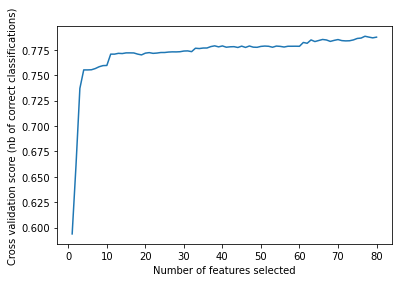

In [54]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [55]:
KSFDR

,ks,FDR,rank_ks,rank_FDR,average_rank
variable_name,,,,,
address_day_since,0.334673,0.355789,450.0,450.0,450.00
address_count_30,0.333297,0.354565,449.0,449.0,449.00
address_count_60,0.325596,0.349934,448.0,448.0,448.00
address_count_14,0.322785,0.346352,447.0,447.0,447.00
address_count_7,0.301954,0.322237,446.0,446.0,446.00
...,...,...,...,...,...
zip_homephone_ssn_count_0,0.001717,0.034688,2.0,12.5,7.25
lastname_homephone_ssn_count_0,0.001713,0.034688,1.0,12.5,6.75
zip_namedob_homephone_ssn_count_0,0.001745,0.034600,8.0,4.0,6.00


In [56]:
a = [column]
b = sps.ks_2samp(mydata[mydata['fraud_label'] == 0][column], mydata[mydata['fraud_label'] == 1][column])[0]
a.append(b)
print(f'variable {column} ---> Done')
table.append(a)

variable zip_namedob_homephone_ssn_count_1_by_30 ---> Done


In [57]:
testdf = mydata.copy()

testdf['random'] = np.random.uniform(0,1)

In [58]:
random = np.random.rand(len(testdf), 1)
testdf['random'] = random

In [59]:
label_ks = sps.ks_2samp(testdf[testdf['fraud_label'] == 0]['fraud_label'], testdf[testdf['fraud_label'] ==1]['fraud_label'])[0]

In [60]:
random_ks = sps.ks_2samp(testdf[testdf['fraud_label'] == 0]['random'], testdf[testdf['fraud_label'] ==1]['random'])[0]

In [61]:
temp = testdf[['fraud_label']].copy()
numbads = sum(temp['fraud_label'])
temp0 = temp.sort_values('fraud_label', ascending = False)
temp1 = temp0.head(topRows)
temp2 = temp0.tail(topRows)
needed1 = temp1.loc[:, 'fraud_label']
needed2 = temp2.loc[:, 'fraud_label']
FDR1 = sum(needed1)/numbads
FDR2 = sum(needed2)/numbads
FDRate = np.maximum(FDR1, FDR2)
label_FDR = FDRate

In [62]:
temp = testdf[['random', 'fraud_label']].copy()
numbads = sum(temp['fraud_label'])
temp0 = temp.sort_values('random', ascending = False)
temp1 = temp0.head(topRows)
temp2 = temp0.tail(topRows)
needed1 = temp1.loc[:, 'fraud_label']
needed2 = temp2.loc[:, 'fraud_label']
FDR1 = sum(needed1)/numbads
FDR2 = sum(needed2)/numbads
FDRate = np.maximum(FDR1, FDR2)
random_FDR = FDRate

In [63]:
test_KSFDR = KSFDR.iloc[:, :2].reset_index().copy()
test_KSFDR

,variable_name,ks,FDR
0,address_day_since,0.334673,0.355789
1,address_count_30,0.333297,0.354565
2,address_count_60,0.325596,0.349934
3,address_count_14,0.322785,0.346352
4,address_count_7,0.301954,0.322237
...,...,...,...
445,zip_homephone_ssn_count_0,0.001717,0.034688
446,lastname_homephone_ssn_count_0,0.001713,0.034688
447,zip_namedob_homephone_ssn_count_0,0.001745,0.034600
448,namedob_homephone_ssn_count_0,0.001743,0.034600


In [64]:
label_rand = pd.DataFrame([['fraud_label', label_ks, label_FDR],
                         ['random', random_ks, random_FDR]], columns = ['variable_name', 'ks', 'FDR'])

In [65]:
label_rand

,variable_name,ks,FDR
0,fraud_label,1.000000,1.000000
1,random,0.005952,0.030668


In [66]:
test_KSFDR = test_KSFDR.append(label_rand).reset_index()

In [67]:
test_KSFDR['rank_ks'] = test_KSFDR['ks'].rank(ascending = True)
test_KSFDR['rank_FDR'] = test_KSFDR['FDR'].rank(ascending = True)
test_KSFDR.sort_values(by = ['ks'], ascending = False, inplace = True)

In [ ]:
test_KSFDR.to_excel('rank_by_ks.xlsx')

In [68]:
test_KSFDR.sort_values(by = ['FDR'], ascending = False, inplace = True)

In [ ]:
test_KSFDR.to_excel('rank_by_FDR.xlsx')

In [170]:
a = pd.DataFrame([[1,2,3,4,5],
            [6,7,8,9,10],
            [11,12,13,14,15]], columns = ['one', 'two', 'three', 'four', 'five'])
display(a)

,one,two,three,four,five
0,1,2,3,4,5
1,6,7,8,9,10
2,11,12,13,14,15


In [134]:
a

,one,two,three,four,five,ks
0,1,2,3,4,5,18.0
1,6,7,8,9,10,21.0
2,11,12,13,14,15,24.0


In [123]:
a

,one,two,three,four,five,ks
0,1,2,3,4,5,NaN
1,6,7,8,9,10,NaN
2,11,12,13,14,15,NaN


In [171]:
a['fraud_label'] = ['0', '1', '0']

In [172]:
a

,one,two,three,four,five,fraud_label
0,1,2,3,4,5,0
1,6,7,8,9,10,1
2,11,12,13,14,15,0


In [174]:
temp = a[['one', 'fraud_label']].copy()